In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
# don't touch unless you know what you are doing
import sys
sys.path.append('c:/Users/oliver/projects/aerostructures/src/aerostructures/')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import boltgroup2d as bg

# BoltGroup2D

## User Input

**Define Bolt group geometry**

Per bolt: 

+    Bolt id -> String (must be unique!)
+    x coordinate, 
+    y coordinate, 
+    allowable load
+    bolt type/description, 

Define load application point U

+ tuple (x: float, y: float)

In [4]:
geo_descr = "<unknown aircraft>, Wing/Fuselage Joint, Dwg. 57-123456 issue 1"

#       boltid,    x,     y, Pallow,                      description
bolts = [('B1',  0.0,   0.0, 10000., 'EN6114-5, allowables from xxxx'),
         ('B2', 25.0,   0.0, 10000., 'EN6114-5'),
         ('B3', 50.0,   0.0, 20000., 'EN6114-5'),
         ('B4',  0.0, -40.0, 10000., 'EN6114-5'),
         ('B5', 25.0,  40.0, 10000., 'EN6114-5'),
         ('B6', 50.0,  40.0, 10000., 'EN6114-5')]

#       xu, yu
lap = (55., 2.)

NOTE: insert drawings, sketsches

**Define analysis name and loads**

for each load case:

+ lcid: int -> must be unique!
+ Fx: float
+ Fy: float
+ Mz: float
+ description: str

as an alternative, load a file with comma separated values. fields must be entered in the order
defined. 

1, 10000., 0., 0., Case 1

2, 0., 10000., 0., Case 2

...

loads = np.loadtxt('boltgroup_loads.txt', delimiter=',', dtype=bg.dt_boltload)

In [7]:
load_descr = "Load Loop 37, GFEM d110609, GPFORCE @ node <x>, from bar element <y>"

loads = [(1, 40000., 0., 0., 'Case 1'),
         (2, 0., 30000., 0., 'Case 2'),
         (4, -5000., 10000., 100000., 'Case 4'),
         (3, 0., 0., 200000., 'Case 3')]

# loads = np.loadtxt('boltgroup_loads.txt', delimiter=',', dtype=bg.dt_boltload)

In [8]:
#arr_bolts = np.array(bolts, dtype=bg.dt_bolt)
#arr_loads = np.array(loads, dtype=bg.dt_boltload)
bgroup = bg.BoltGroup2D(bolts, lap, label=geo_descr)
r = bgroup.analyse(loads, label=load_descr)

## Analysis Definition


Bolt group definition
<unknown aircraft>, Wing/Fuselage Joint, Dwg. 57-123456 issue 1

    boltid          x          y     Fallow descrp              
---------- ---------- ---------- ---------- --------------------
        B1       0.00       0.00    10000.0 EN6114-5, allowables from xxxx
        B2      25.00      25.00    10000.0 EN6114-5            
        B3      50.00      50.00    20000.0 EN6114-5            
        B4       0.00       0.00    10000.0 EN6114-5            
        B5      25.00      25.00    10000.0 EN6114-5            
        B6      50.00      50.00    10000.0 EN6114-5            


Bolt group properties

CG S:  (28.57, 5.71)
LAP U: (55.00, 2.00)


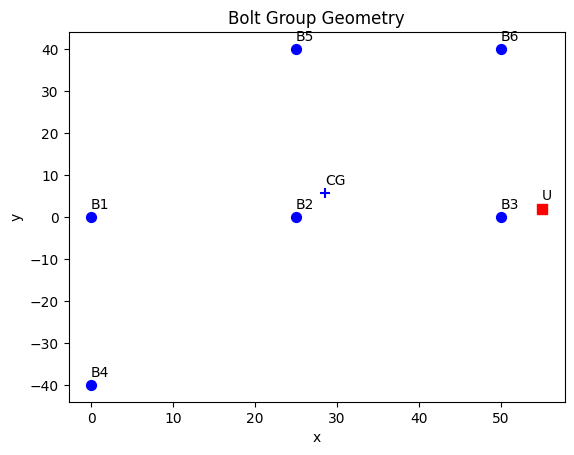

In [11]:
# three lowest RFs
# should include allowable load
# print 'Number of results: ', len(r)
r.plot_geometry()

# bolt definition summary
print('\nBolt group definition')
print(bgroup.label)
b = np.sort(r.bolts, order='boltid')
print(bg.geo2string(b))

# bolt group properties
print('\nBolt group properties\n')
print('CG S:  ({0[0]:.2f}, {0[1]:.2f})'.format(r.cg))
print('LAP U: ({0[0]:.2f}, {0[1]:.2f})'.format(r.lap))




## Results

In [12]:
# loading
print('\nApplied Loads')
print(r.label)
sl = np.sort(r.applied_loads, order='lcid')
print(bg.lcase2string(sl))

# lowest overall RFs
m3 = r.lowest_rfs(n=3)
print('\n3 lowest reserve factors')
print(bg.result2string(m3))

# 3 most critical load cases


# lowest RF per bolt
print('\nLowest reserve factors, per bolt')


Applied Loads
Load Loop 37, GFEM d110609, GPFORCE @ node <x>, from bar element <y>

      lcid         Fx         Fy       Mz,u descrp              
---------- ---------- ---------- ---------- --------------------
         1    40000.0        0.0        0.0 Case 1              
         2        0.0    30000.0        0.0 Case 2              
         3        0.0        0.0   200000.0 Case 3              
         4    -5000.0    10000.0   100000.0 Case 4              


3 lowest reserve factors

    boltid     Fallow       lcid         Fx         Fy          F         RF
---------- ---------- ---------- ---------- ---------- ---------- ----------
        B6    10000.0          2    -3573.4     6519.1     7434.3       1.35
        B4    10000.0          1     6607.1     -558.0     6630.6       1.51
        B3    20000.0          2     1191.1    13038.2    13092.5       1.53


Lowest reserve factors, per bolt


<Axes: title={'center': 'Bolt Forces, Case 2'}, xlabel='x', ylabel='y'>

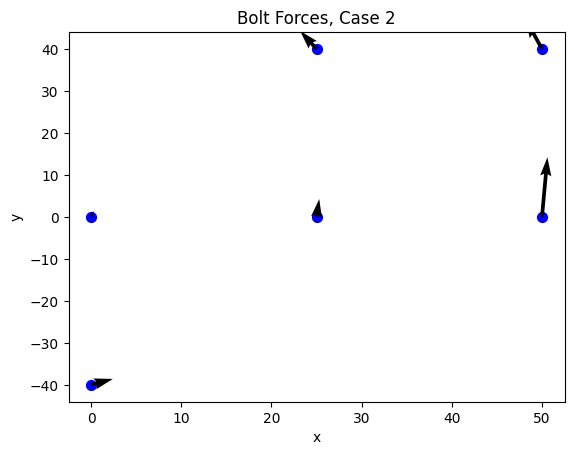

In [13]:
r.plot_forces(2)

<Axes: title={'center': 'Bolt Forces, Case 1'}, xlabel='x', ylabel='y'>

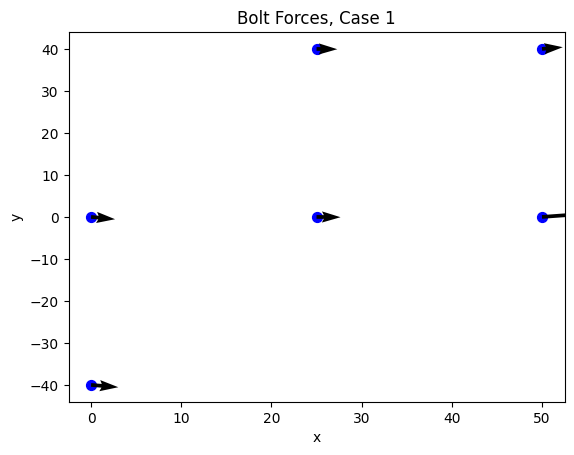

In [14]:
r.plot_forces(1)

## All Results

In [15]:
# all results
print(bg.result2string(r.results))


    boltid     Fallow       lcid         Fx         Fy          F         RF
---------- ---------- ---------- ---------- ---------- ---------- ----------
        B1    10000.0          1     5825.9     -558.0     5852.6       1.71
        B1    10000.0          2      595.6     1307.8     1437.1       6.96
        B1    10000.0          4     -454.6      130.1      472.8      21.15
        B1    10000.0          3      150.2     -751.2      766.0      13.05
        B2    10000.0          1     5825.9      -69.8     5826.3       1.72
        B2    10000.0          2      595.6     3913.5     3958.5       2.53
        B2    10000.0          4     -454.6     1266.3     1345.4       7.43
        B2    10000.0          3      150.2      -93.9      177.2      56.44
        B3    20000.0          1    11651.8      837.0    11681.8       1.71
        B3    20000.0          2     1191.1    13038.2    13092.5       1.53
        B3    20000.0          4     -909.2     4804.8     4890.1       4.0